# Imports Libraries and Tools

In [5]:
import os  # For directory and file operations
import numpy as np  # For numerical operations and handling image arrays
import random  # For generating random values for augmentation
from PIL import Image, ImageEnhance  # For image processing and enhancement
from tensorflow.keras.preprocessing.image import load_img  # For loading images
from tensorflow.keras.models import Sequential  # For building the model
from tensorflow.keras.layers import Input, Flatten, Dropout, Dense  # For model layers
from tensorflow.keras.optimizers import Adam  # For optimizer
from tensorflow.keras.applications import VGG16  # For using VGG16 model
from sklearn.utils import shuffle  # For shuffling the data

# Load Datasets

In [12]:
# Directories for training and testing data
train_dir = "C:\\Users\\User\\2025\\Brain Tumor Classification\\brain-tumor-mri-dataset\\Training"
test_dir = "C:\\Users\\User\\2025\\Brain Tumor Classification\\brain-tumor-mri-dataset\\Testing"
# Load and shuffle the train data
train_paths = []
train_labels = []
for label in os.listdir(train_dir):
    for image in os.listdir(os.path.join(train_dir, label)):
        train_paths.append(os.path.join(train_dir, label, image))
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

# Load and shuffle the test data
test_paths = []
test_labels = []
for label in os.listdir(test_dir):
    for image in os.listdir(os.path.join(test_dir, label)):
        test_paths.append(os.path.join(test_dir, label, image))
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

## Train and Test number of Images


In [76]:
import os
from sklearn.utils import shuffle

# Directories for training and testing data
train_dir = "C:\\Users\\User\\2025\\Brain Tumor Classification\\brain-tumor-mri-dataset\\Training"
test_dir = "C:\\Users\\User\\2025\\Brain Tumor Classification\\brain-tumor-mri-dataset\\Testing"

# Load and shuffle the train data
train_paths = []
train_labels = []
for label in os.listdir(train_dir):
    for image in os.listdir(os.path.join(train_dir, label)):
        train_paths.append(os.path.join(train_dir, label, image))
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

# Load and shuffle the test data
test_paths = []
test_labels = []
for label in os.listdir(test_dir):
    for image in os.listdir(os.path.join(test_dir, label)):
        test_paths.append(os.path.join(test_dir, label, image))
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

# Afficher le nombre d'images dans le dossier de training
print(f"Nombre d'images dans le dossier de training: {len(train_paths)}")

# Afficher le nombre d'images dans le dossier de test
print(f"Nombre d'images dans le dossier de test: {len(test_paths)}")

Nombre d'images dans le dossier de training: 5713
Nombre d'images dans le dossier de test: 1311


## Train and Test Split Rate

In [79]:
# Calculer le nombre total d'images
total_images = len(train_paths) + len(test_paths)

# Calculer les pourcentages
pourcentage_train = (len(train_paths) / total_images) * 100
pourcentage_test = (len(test_paths) / total_images) * 100

# Afficher les résultats
print(f"Répartition des images :")
print(f"- Training : {pourcentage_train:.2f}%")
print(f"- Testing  : {pourcentage_test:.2f}%")

Répartition des images :
- Training : 81.34%
- Testing  : 18.66%


In [81]:
## Name of Classes in the Dataset

In [83]:
# Convertir la liste des labels en un ensemble pour obtenir les classes uniques
unique_classes = set(train_labels)

# Afficher le nombre de classes différentes
nombre_classes = len(unique_classes)
print(f"Nombre de classes différentes dans le dataset : {nombre_classes}")

# Optionnel : Afficher les noms des classes
print(f"Liste des classes : {unique_classes}")

Nombre de classes différentes dans le dataset : 4
Liste des classes : {'pituitary', 'notumor', 'glioma', 'meningioma'}


## Repartition of images by Classes

In [86]:
from collections import Counter

# Compter le nombre d'images par classe dans l'ensemble d'entraînement
train_class_counts = Counter(train_labels)

# Afficher le nombre d'images par classe
print("Nombre d'images par classe dans l'ensemble d'entraînement :")
for classe, count in train_class_counts.items():
    print(f"- {classe} : {count} images")

Nombre d'images par classe dans l'ensemble d'entraînement :
- meningioma : 1339 images
- glioma : 1322 images
- notumor : 1595 images
- pituitary : 1457 images


In [88]:
# Compter le nombre d'images par classe dans l'ensemble de test
test_class_counts = Counter(test_labels)

# Afficher le nombre d'images par classe
print("\nNombre d'images par classe dans l'ensemble de test :")
for classe, count in test_class_counts.items():
    print(f"- {classe} : {count} images")


Nombre d'images par classe dans l'ensemble de test :
- pituitary : 300 images
- glioma : 300 images
- meningioma : 306 images
- notumor : 405 images


## Distribution des données par classes

In [91]:
# Combiner les compteurs pour avoir le total par classe
total_class_counts = train_class_counts + test_class_counts

# Afficher le nombre total d'images par classe
print("\nNombre total d'images par classe dans le dataset :")
for classe, count in total_class_counts.items():
    print(f"- {classe} : {count} images")


Nombre total d'images par classe dans le dataset :
- meningioma : 1645 images
- glioma : 1622 images
- notumor : 2000 images
- pituitary : 1757 images


## Visualisation de laDistribution des données par classes


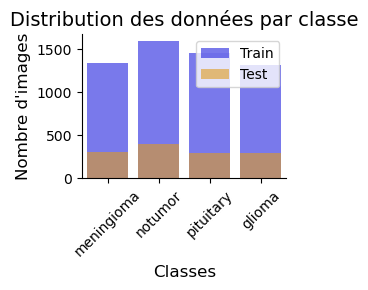

In [94]:
import os
from sklearn.utils import shuffle
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Activer le mode inline pour éviter les barres déroulantes
%matplotlib inline

# Directories for training and testing data
train_dir = "C:\\Users\\User\\2025\\Brain Tumor Classification\\brain-tumor-mri-dataset\\Training"
test_dir = "C:\\Users\\User\\2025\\Brain Tumor Classification\\brain-tumor-mri-dataset\\Testing"

# Load and shuffle the train data
train_paths = []
train_labels = []
for label in os.listdir(train_dir):
    for image in os.listdir(os.path.join(train_dir, label)):
        train_paths.append(os.path.join(train_dir, label, image))
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

# Load and shuffle the test data
test_paths = []
test_labels = []
for label in os.listdir(test_dir):
    for image in os.listdir(os.path.join(test_dir, label)):
        test_paths.append(os.path.join(test_dir, label, image))
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

# Compter le nombre d'images par classe dans l'ensemble d'entraînement et de test
train_class_counts = Counter(train_labels)
test_class_counts = Counter(test_labels)

# Extraire les classes et les comptes
classes = list(train_class_counts.keys())
train_counts = [train_class_counts[classe] for classe in classes]
test_counts = [test_class_counts[classe] for classe in classes]

# Créer un graphique en barres pour visualiser la distribution
plt.figure(figsize=(3, 3))  # Ajuster la taille de la figure
sns.barplot(x=classes, y=train_counts, color="blue", alpha=0.6, label="Train")
sns.barplot(x=classes, y=test_counts, color="orange", alpha=0.6, label="Test")
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Nombre d'images", fontsize=12)
plt.title("Distribution des données par classe", fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotation des labels pour une meilleure lisibilité
plt.legend()
sns.despine()  # Supprime les bordures inutiles
plt.tight_layout()  # Optimise l'espace

# Afficher le graphique sans barre déroulante
plt.show()

## Repartition NoTumor and Tumor

In [97]:
from collections import Counter

# Compter les occurrences de chaque classe dans l'ensemble d'entraînement et de test
train_class_counts = Counter(train_labels)
test_class_counts = Counter(test_labels)

# Nombre total d'images dans l'ensemble d'entraînement et de test
total_train = sum(train_class_counts.values())
total_test = sum(test_class_counts.values())

# Nombre d'images de la classe 'notumor' dans l'ensemble d'entraînement et de test
notumor_train = train_class_counts.get('notumor', 0)
notumor_test = test_class_counts.get('notumor', 0)

# Pourcentage de 'notumor' dans l'ensemble d'entraînement et de test
pourcentage_notumor_train = (notumor_train / total_train) * 100
pourcentage_notumor_test = (notumor_test / total_test) * 100

# Pourcentage total de 'notumor' dans le dataset complet
total_notumor = notumor_train + notumor_test
total_images = total_train + total_test
pourcentage_notumor_total = (total_notumor / total_images) * 100

# Afficher les résultats
print("Pourcentage de 'notumor' dans l'ensemble d'entraînement : {:.2f}%".format(pourcentage_notumor_train))
print("Pourcentage de 'notumor' dans l'ensemble de test : {:.2f}%".format(pourcentage_notumor_test))
print("Pourcentage de 'notumor' dans le dataset complet : {:.2f}%".format(pourcentage_notumor_total))

Pourcentage de 'notumor' dans l'ensemble d'entraînement : 27.92%
Pourcentage de 'notumor' dans l'ensemble de test : 30.89%
Pourcentage de 'notumor' dans le dataset complet : 28.47%


## Visualisation Repartition NOTumor and Tumor


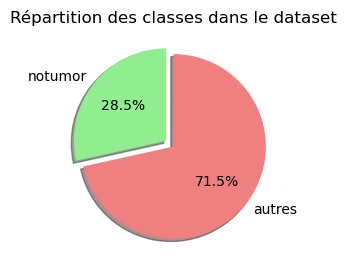

In [102]:
import matplotlib.pyplot as plt
from collections import Counter

# Compter les occurrences de chaque classe
train_class_counts = Counter(train_labels)
test_class_counts = Counter(test_labels)

# Combiner les comptes pour le dataset complet
total_class_counts = {
    'notumor': train_class_counts.get('notumor', 0) + test_class_counts.get('notumor', 0),
    'autres': sum(train_class_counts.values()) + sum(test_class_counts.values()) - (train_class_counts.get('notumor', 0) + test_class_counts.get('notumor', 0))
}

# Données pour le camembert
labels = list(total_class_counts.keys())
sizes = list(total_class_counts.values())
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Mettre en évidence la classe 'notumor'

# Créer un camembert
plt.figure(figsize=(3, 3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Répartition des classes dans le dataset")
plt.show()

# Data Visualization

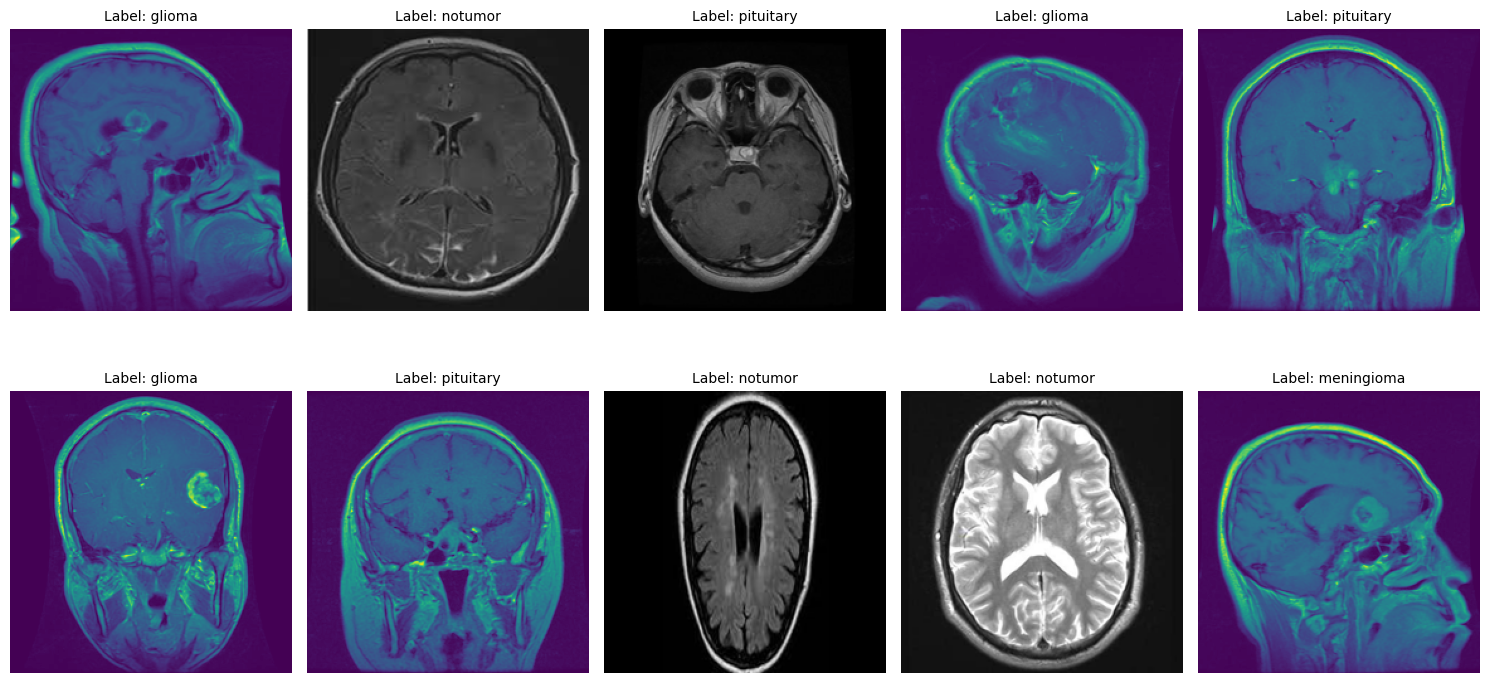

In [14]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import os

# Select random indices for 10 images
random_indices = random.sample(range(len(train_paths)), 10)

# Create a figure to display images in 2 rows
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.ravel()

for i, idx in enumerate(random_indices):
    # Load image
    img_path = train_paths[idx]
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Resize to consistent size

    # Display image
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axis
    # Display class label in the second row
    axes[i].set_title(f"Label: {train_labels[idx]}", fontsize=10)

plt.tight_layout()
plt.show()


# Image Preprocessing (Helper Functions)

In [16]:
# Image Augmentation function
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))  # Random brightness
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))  # Random contrast
    image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    return image

# Load images and apply augmentation
def open_images(paths):
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)

# Encoding labels (convert label names to integers)
def encode_label(labels):
    unique_labels = os.listdir(train_dir)  # Ensure unique labels are determined
    encoded = [unique_labels.index(label) for label in labels]
    return np.array(encoded)

# Data generator for batching
def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for i in range(0, len(paths), batch_size):
            batch_paths = paths[i:i + batch_size]
            batch_images = open_images(batch_paths)  # Open and augment images
            batch_labels = labels[i:i + batch_size]
            batch_labels = encode_label(batch_labels)  # Encode labels
            yield batch_images, batch_labels  # Yield the batch

# MODEL:

## WE ARE USING VGG16 FOR TRANSFER LEARNING.

Le modèle repose sur VGG16, un réseau de neurones convolutifs (CNN) pré-entraîné pour la classification d'images.

Tout d'abord, le modèle VGG16 est chargé avec input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False, weights='imagenet'. La forme d'entrée est définie pour correspondre à la taille des images du jeu de données, soit 128 x 128 pixels. Le paramètre include_top est défini sur False, ce qui signifie que les couches finales entièrement connectées de VGG16 qui effectuent la classification ne seront pas incluses. Le paramètre weights est défini sur 'imagenet', ce qui signifie que le modèle sera pré-entraîné avec un jeu de données de 1,4 million d'images appelé imagenet.

Ensuite, la boucle for layer in base_model.layers: permet de définir toutes les couches du modèle de base (VGG16) comme non entraînables, afin que leurs pondérations ne soient pas mises à jour pendant l'entraînement.

Ensuite, les trois dernières couches du modèle VGG16 sont définies comme étant entrainables grâce aux commandes base_model.layers[-2].trainable = True, base_model.layers[-3].trainable = True et base_model.layers[-4].trainable = True.

Ensuite, un modèle séquentiel est créé et le modèle VGG16 y est ajouté avec model.add(base_model).

Ensuite, une couche d'aplatissement est ajoutée au modèle avec model.add(Flatten()), qui transforme la sortie du modèle VGG16 d'un tenseur 3D en un tenseur 1D, afin qu'elle puisse être traitée par les couches suivantes.

Ensuite, une couche d'abandon est ajoutée avec model.add(Dropout(0.3)), qui permet d'éviter le surapprentissage en définissant aléatoirement une fraction d'unités d'entrée à 0 à chaque mise à jour pendant la période d'apprentissage.

Ensuite, une couche dense de 128 neurones est ajoutée, suivie d'une fonction d'activation relu (model.add(Dense(128, activation='relu')).

Ensuite, une autre couche Dropout est ajoutée (model.add(Dropout(0.2)).

Enfin, la couche dense de sortie est ajoutée avec un nombre de neurones égal au nombre d'étiquettes uniques, puis une fonction d'activation « softmax » est ajoutée (model.add(Dense(len(unique_labels), activation='softmax')). Cette fonction d'activation permet d'obtenir une distribution de probabilité sur les classes possibles.

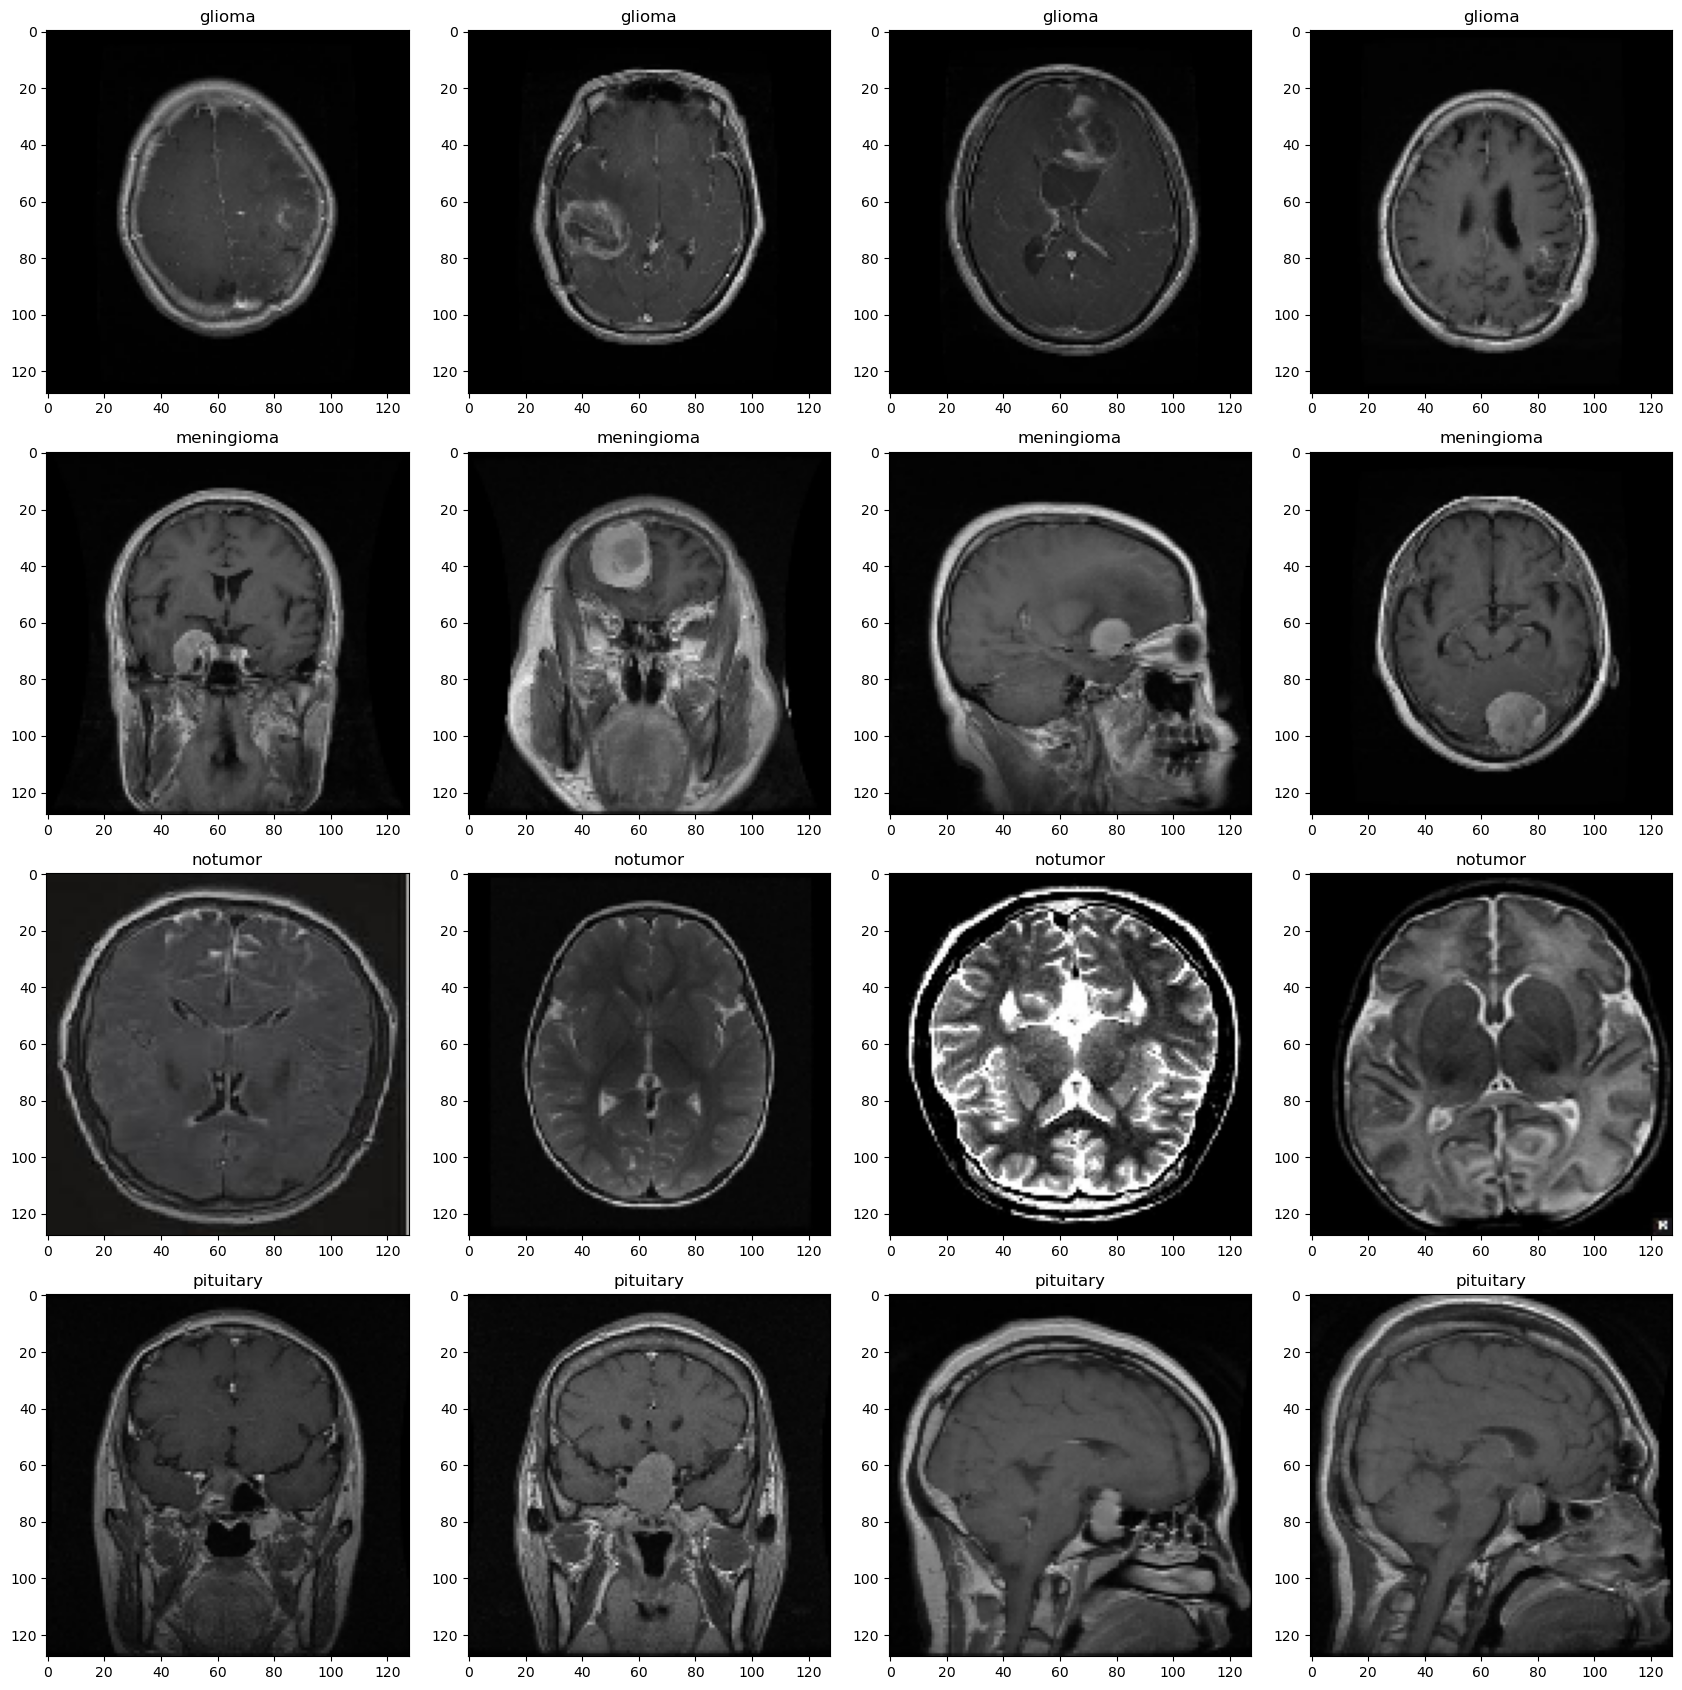

Epoch 1/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 376s 1s/step - loss: 0.6126 - sparse_categorical_accuracy: 0.7562
Epoch 2/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 361s 1s/step - loss: 0.2107 - sparse_categorical_accuracy: 0.9217
Epoch 3/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 355s 1s/step - loss: 0.1274 - sparse_categorical_accuracy: 0.9506
Epoch 4/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 355s 1s/step - loss: 0.0898 - sparse_categorical_accuracy: 0.9626
Epoch 5/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 359s 1s/step - loss: 0.0934 - sparse_categorical_accuracy: 0.9615


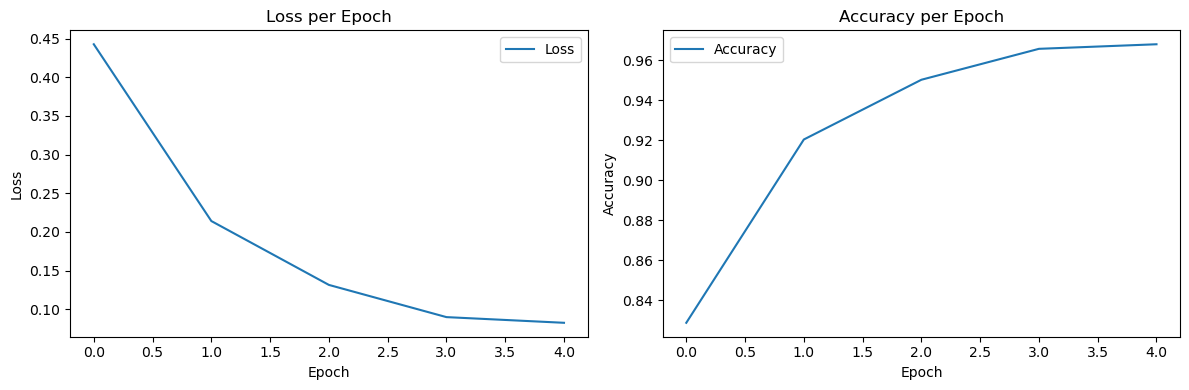

65/65 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - loss: 0.1432 - sparse_categorical_accuracy: 0.9461
Loss sur les données de test: 0.1666
Accuracy sur les données de test: 0.9369


In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Définir les chemins des répertoires de données
train_dir = "C:/Users/User/2025/Brain Tumor Classification/brain-tumor-mri-dataset/Training"
test_dir = "C:/Users/User/2025/Brain Tumor Classification/brain-tumor-mri-dataset/Testing"

# Définir les classes (noms des sous-dossiers)
classes = sorted(os.listdir(train_dir))

# Charger et mélanger les données d'entraînement
train_paths = []
train_labels = []
for label in classes:
    label_path = os.path.join(train_dir, label)
    if os.path.isdir(label_path):
        for image in os.listdir(label_path):
            if os.path.isfile(os.path.join(label_path, image)):
                train_paths.append(os.path.join(label_path, image))
                train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels, random_state=42) # Ajouter random_state pour la reproductibilité

# Charger et mélanger les données de test
test_paths = []
test_labels = []
for label in classes:
    label_path = os.path.join(test_dir, label)
    if os.path.isdir(label_path):
        for image in os.listdir(label_path):
            if os.path.isfile(os.path.join(label_path, image)):
                test_paths.append(os.path.join(label_path, image))
                test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels, random_state=42) # Ajouter random_state pour la reproductibilité

# Afficher quelques images d'entraînement
plt.figure(figsize=(17, 17))
index = 0
num_images_to_display = 4

for c in classes:
    class_paths = [path for path, label in zip(train_paths, train_labels) if label == c][:num_images_to_display]
    for i, path in enumerate(class_paths):
        index += 1
        plt.subplot(4, 4, index)
        img = load_img(path, target_size=(128, 128))
        plt.imshow(img)
        plt.title(c)
plt.tight_layout()
plt.show()

# Fonction de générateur de données
IMAGE_SIZE = 128
def datagen(image_paths, labels, batch_size, epochs):
    num_samples = len(image_paths)
    all_indices = np.arange(num_samples)
    label_map = {label: i for i, label in enumerate(sorted(list(set(labels))))}

    for epoch in range(epochs):
        np.random.shuffle(all_indices)
        for i in range(0, num_samples, batch_size):
            batch_indices = all_indices[i:i + batch_size]
            batch_paths = [image_paths[idx] for idx in batch_indices]
            batch_labels = [labels[idx] for idx in batch_indices]

            batch_images = []
            for path in batch_paths:
                try:
                    img = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
                    img_array = img_to_array(img) / 255.0
                    batch_images.append(img_array)
                except Exception as e:
                    print(f"Erreur lors du chargement de l'image '{path}': {e}")
                    continue

            numerical_labels = np.array([label_map[label] for label in batch_labels])
            yield np.array(batch_images), numerical_labels

# Architecture du modèle
base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze all layers of the VGG16 base model
for layer in base_model.layers:
    layer.trainable = False

# Set the last few layers of the VGG16 base model to be trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

# Build the final model
model = Sequential()
model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(classes), activation='softmax'))

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# Paramètres
batch_size = 20
steps_per_epoch = int(len(train_paths) / batch_size)
epochs = 5

# Entraîner le modèle
history = model.fit(datagen(train_paths, train_labels, batch_size=batch_size, epochs=epochs),
                    epochs=epochs,
                    steps_per_epoch=steps_per_epoch)

# Afficher l'historique de l'entraînement
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['sparse_categorical_accuracy'], label='Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Évaluation du modèle sur les données de test
eval_steps = int(len(test_paths) / batch_size)
loss, accuracy = model.evaluate(datagen(test_paths, test_labels, batch_size=batch_size, epochs=1),
                                steps=eval_steps)
print(f"Loss sur les données de test: {loss:.4f}")
print(f"Accuracy sur les données de test: {accuracy:.4f}")

# Train and Val Plots

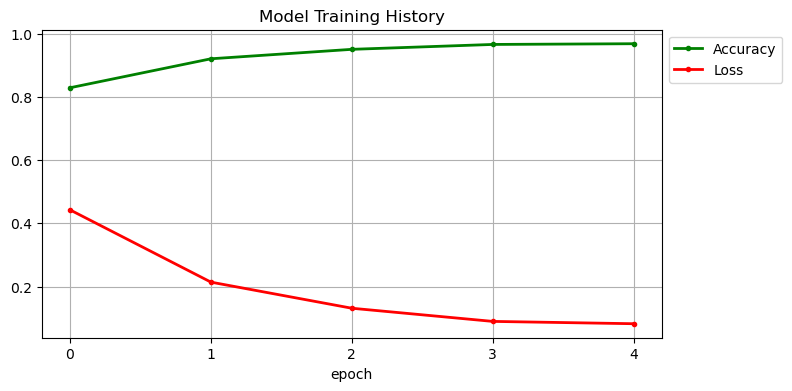

In [25]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Model Classification Report

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
import numpy as np

# 1. Prediction on test data
test_images = open_images(test_paths)  # Load and augment test images
test_labels_encoded = encode_label(test_labels)  # Encode the test labels

# Predict using the trained model
test_predictions = model.predict(test_images)

# 2. Classification Report
print("Classification Report:")
print(classification_report(test_labels_encoded, np.argmax(test_predictions, axis=1)))


41/41 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       300
           1       0.96      0.74      0.84       306
           2       1.00      0.99      1.00       405
           3       0.92      0.99      0.95       300

    accuracy                           0.93      1311
   macro avg       0.93      0.92      0.92      1311
weighted avg       0.93      0.93      0.93      1311



# Model Confusion Plot

Confusion Matrix:
[[292   7   0   1]
 [ 54 227   0  25]
 [  3   1 401   0]
 [  1   2   0 297]]


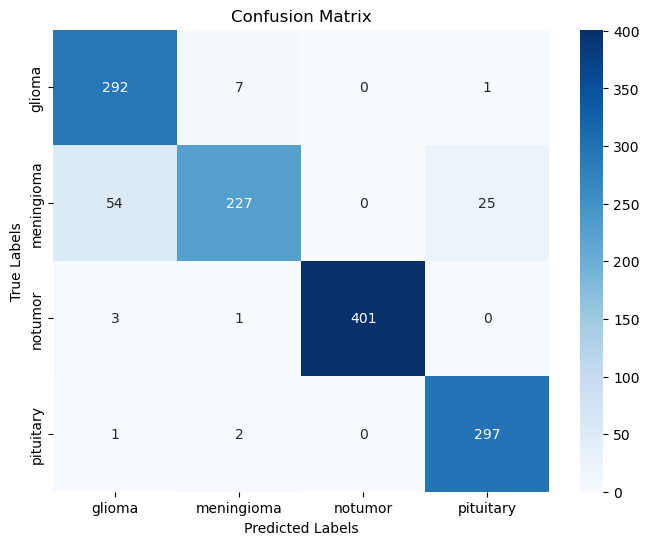

In [29]:
# 3. Confusion Matrix
conf_matrix = confusion_matrix(test_labels_encoded, np.argmax(test_predictions, axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=os.listdir(train_dir), yticklabels=os.listdir(train_dir))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Roc Curve Plot


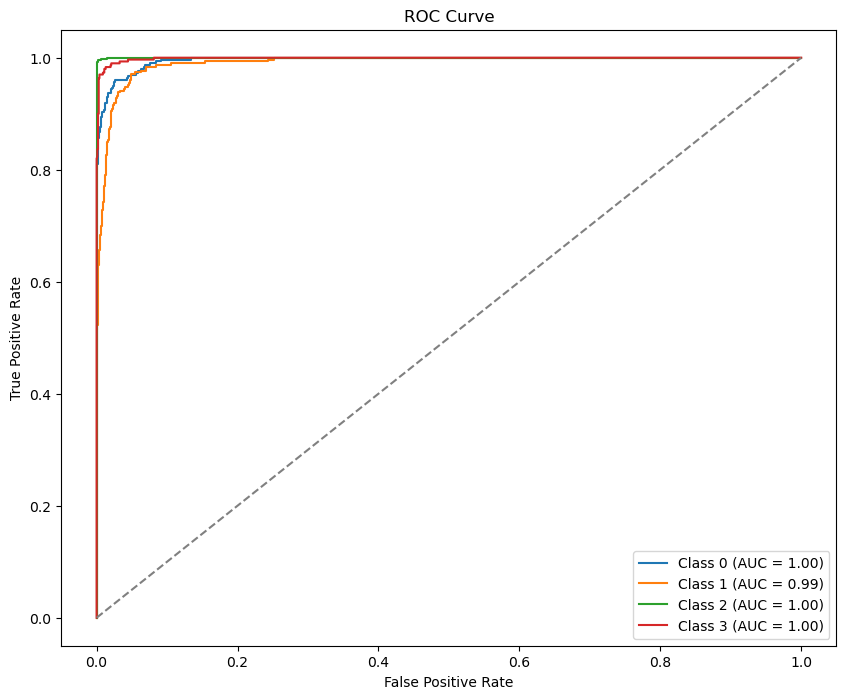

In [31]:
# 4. ROC Curve and AUC
# Binarize the test labels and predictions for multi-class ROC
test_labels_bin = label_binarize(test_labels_encoded, classes=np.arange(len(os.listdir(train_dir))))
test_predictions_bin = test_predictions  # The predicted probabilities for each class

# Compute ROC curve and ROC AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(os.listdir(train_dir))):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], test_predictions_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(os.listdir(train_dir))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Save & Load Model

In [37]:
# Save the entire model
model.save('model.h5')

In [39]:
from tensorflow.keras.models import load_model
# Load the trained model
model = load_model('model.h5')

# MRI Tumor Detection System

In [42]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Class labels
class_labels = ['pituitary', 'glioma', 'notumor', 'meningioma']

def detect_and_display(img_path, model, image_size=128):
    """
    Function to detect tumor and display results.
    If no tumor is detected, it displays "No Tumor".
    Otherwise, it shows the predicted tumor class and confidence.
    """
    try:
        # Load and preprocess the image
        img = load_img(img_path, target_size=(image_size, image_size))
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Make a prediction
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        confidence_score = np.max(predictions, axis=1)[0]

        # Determine the class
        if class_labels[predicted_class_index] == 'notumor':
            result = "No Tumor"
        else:
            result = f"Tumor: {class_labels[predicted_class_index]}"

        # Display the image with the prediction
        plt.imshow(load_img(img_path))
        plt.axis('off')
        plt.title(f"{result} (Confidence: {confidence_score * 100:.2f}%)")
        plt.show()

    except Exception as e:
        print("Error processing the image:", str(e))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


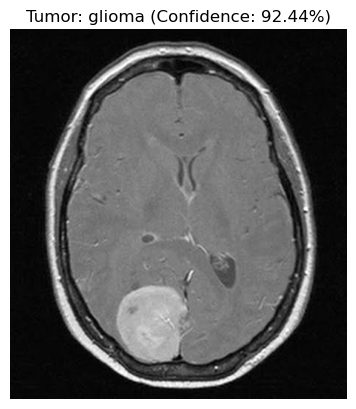

In [64]:
# Example usage
image_path = "C:/Users/User/2025/Brain Tumor Classification/brain-tumor-mri-dataset/Testing/meningioma/Te-me_0010.jpg"  # Provide the path to your new image
detect_and_display(image_path, model)

In [66]:

# Example usage
image_path = "C:/Users/User/2025/Brain Tumor Classification/brain-tumor-mri-dataset/Testing/meningioma/Te-me_0004.jpg"  # Provide the path to your new image
detect_and_display(image_path, model)

Error processing the image: [Errno 2] No such file or directory: 'C:/Users/User/2025/Brain Tumor Classification/brain-tumor-mri-dataset/Testing/meningioma/Te-me_0004.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


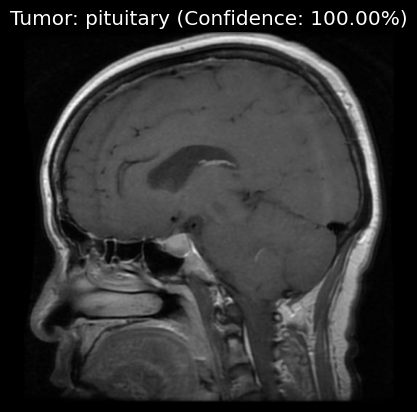

In [ ]:
# Example usage
image_path = '/content/drive/MyDrive/MRI Images/Testing/pituitary/Te-piTr_0003.jpg'  # Provide the path to your new image
detect_and_display(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


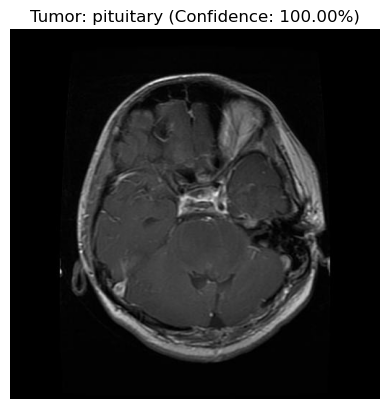

In [68]:
# Example usage
image_path = "C:/Users/User/2025/Brain Tumor Classification/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0010.jpg"  # Provide the path to your new image
detect_and_display(image_path, model)